In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
tips = pd.read_csv(r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Machine Learning\2.Understanding Data\3. EDA_Bi-Variate\tips.csv")

In [3]:
titanic = pd.read_csv(r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Machine Learning\2.Understanding Data\1. Basic 7  Questions\titanic.csv")

In [4]:
flights = pd.read_csv(r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Machine Learning\2.Understanding Data\3. EDA_Bi-Variate\flights.csv")

In [5]:
iris = pd.read_csv(r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Machine Learning\2.Understanding Data\3. EDA_Bi-Variate\IRIS.csv")

# Bi-Variate and Multi Variate Analysis

## Numercal - Numerical

### 1. Scatterplot (Numerical - Numerical)

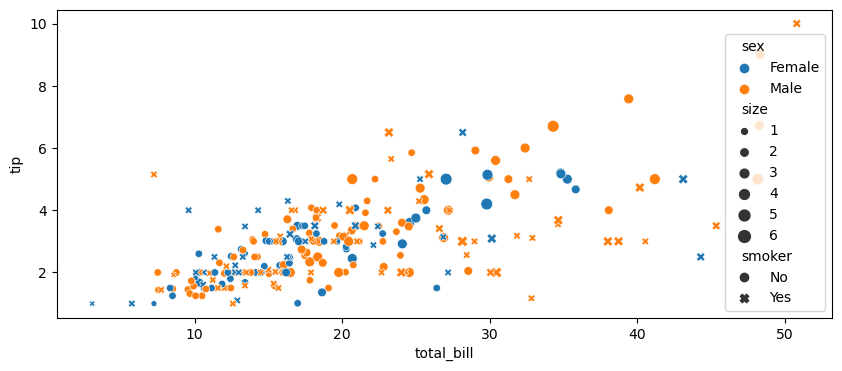

In [6]:
plt.figure(figsize=(10,4))
sns.scatterplot(data= tips, y = 'tip', x = 'total_bill',hue = tips['sex'],style = tips['smoker'], size = tips['size'] )
plt.show()

### 2. Pair Plot(Numerical - Numerical)

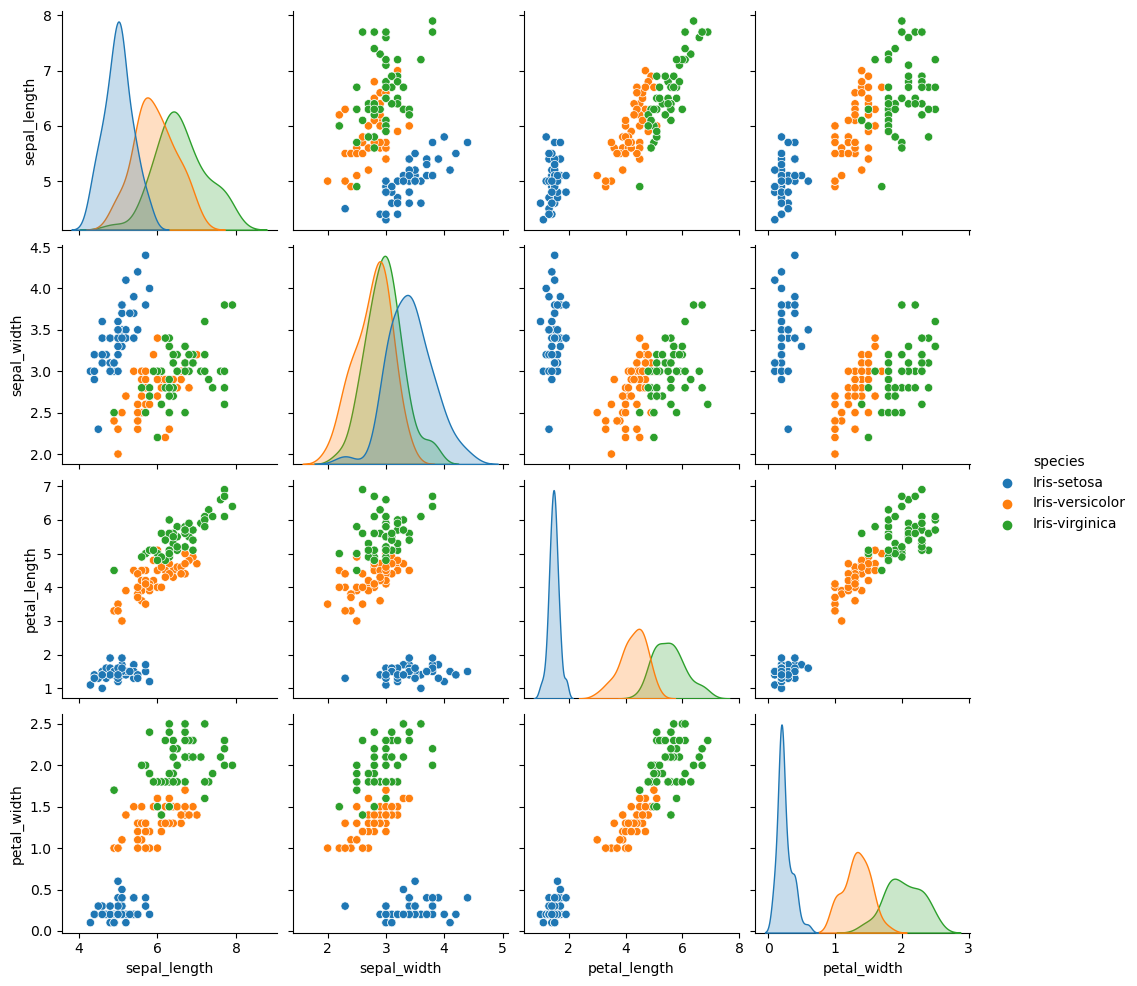

In [7]:
sns.pairplot(iris, hue ='species')
plt.show()

### 3. Line Plot(Numerical - Numerical)
IF X - VALUE IS TIME RELATED

In [8]:
flights.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [9]:
flights_per_year = flights[['year','passengers']].groupby('year').sum().reset_index()

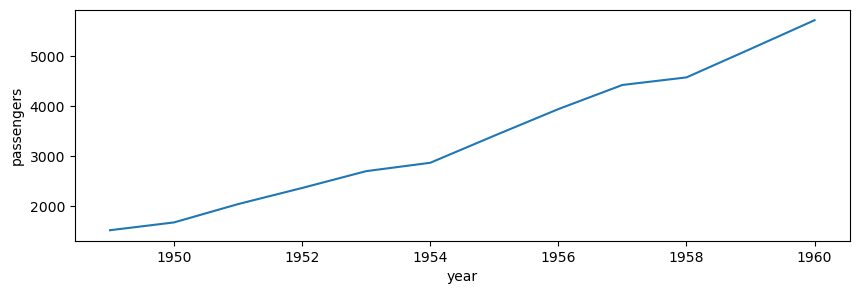

In [10]:
plt.figure(figsize=(10,3))
sns.lineplot(flights_per_year,x='year',y='passengers')
plt.show()

## Numerical - Catagorical

### 1. Barplot( Numerical - Catagorical)

In [11]:
titanic.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C


<Axes: xlabel='Pclass', ylabel='Fare'>

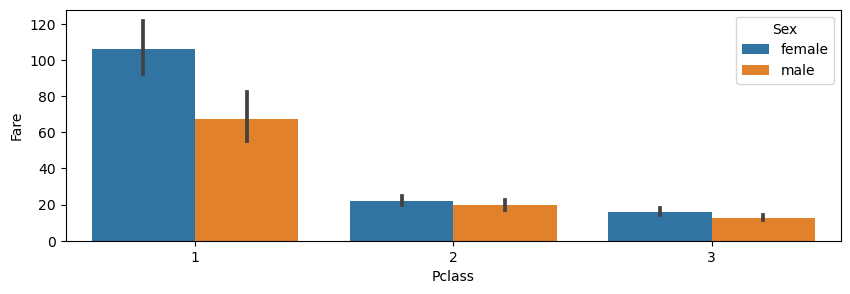

In [12]:
plt.figure(figsize=(10,3))
sns.barplot(titanic,x = 'Pclass', y = 'Fare',hue = 'Sex', hue_order= ['female','male'])

<Axes: xlabel='Pclass', ylabel='count'>

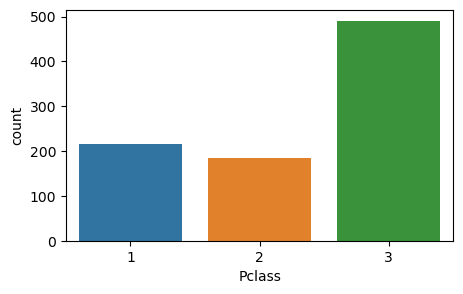

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(titanic,x='Pclass')

### 2. Boxplot( Numerical - Catagorical)

<Axes: xlabel='Sex', ylabel='Age'>

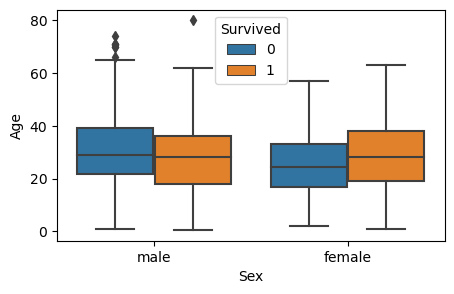

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(titanic,x = 'Sex',y='Age',hue='Survived')

### 3. Distplot( Numerical - Catagorical)

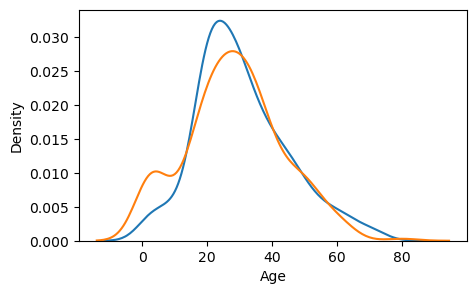

In [15]:
plt.figure(figsize=(5,3))
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist = False)
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist = False)
plt.show()

## Categorical - Categorical

### 1. HeatMap(Categorical  - Categorical)

In [16]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


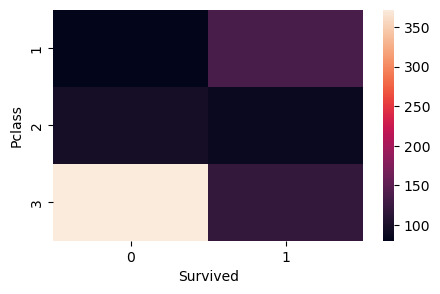

In [17]:
plt.figure(figsize=(5,3))
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))
plt.show()

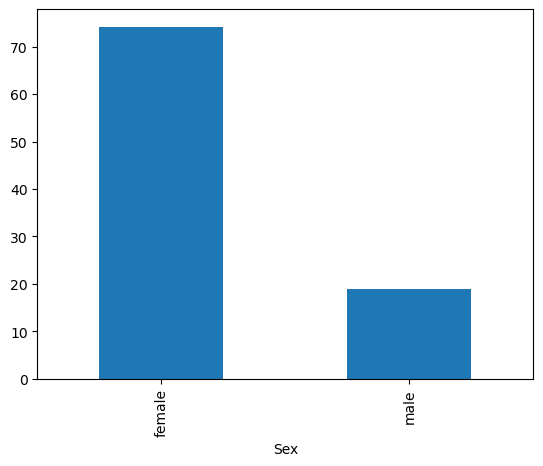

In [18]:
(titanic[['Sex','Survived']].groupby('Sex').mean()['Survived']*100).plot(kind = 'bar')
plt.show()

In [19]:
flights.pivot_table(values = 'passengers', index='year',columns='month')

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


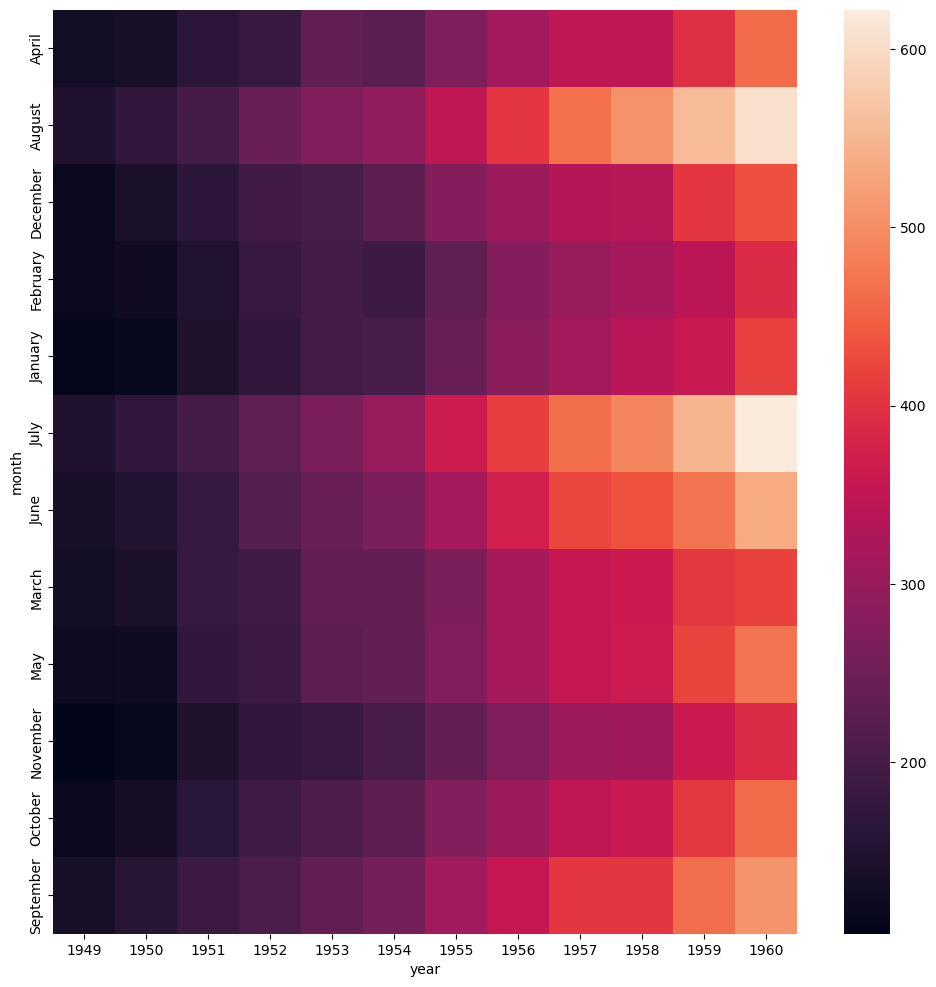

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(flights.pivot_table(values = 'passengers', index='month',columns='year'))
plt.show()

### 2. ClusterMap(Categorical  - Categorical)

In [21]:
pd.crosstab(titanic['SibSp'],titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Figure size 1000x1000 with 0 Axes>

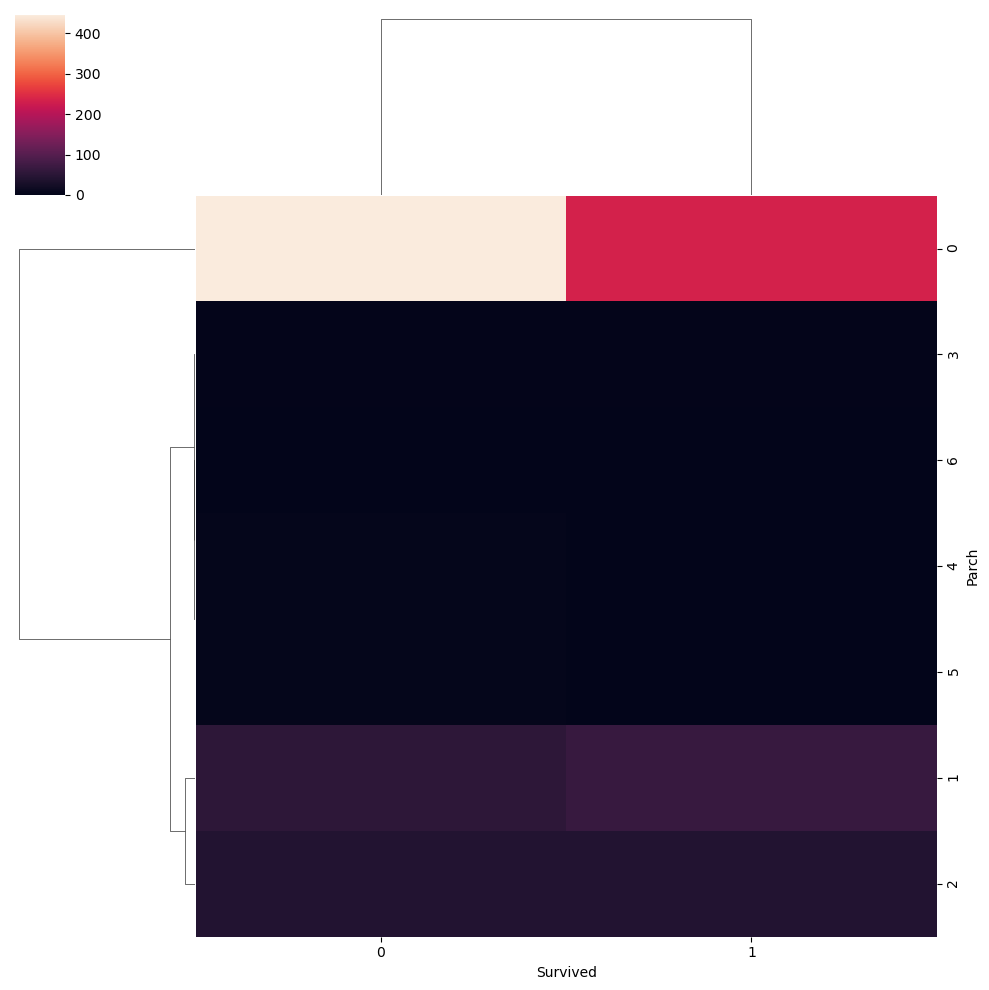

In [22]:
plt.figure(figsize=(10,10))
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

<Figure size 1200x1200 with 0 Axes>

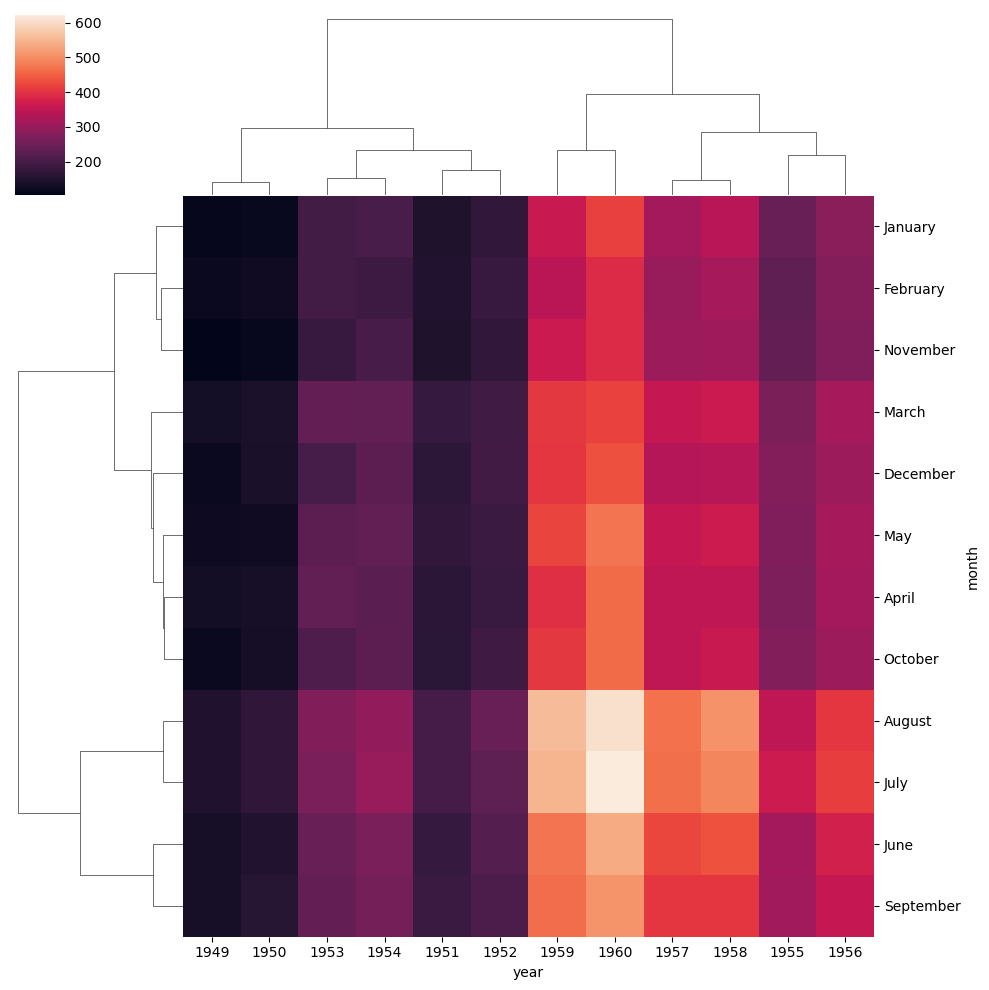

In [23]:
plt.figure(figsize=(12,12))
sns.clustermap(flights.pivot_table(values = 'passengers', index='month',columns='year'))